In [290]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [291]:
# Load data into a Pandas DataFrame
df = pd.read_csv('sensor_data.csv', delimiter=',', skiprows=1, header=None)

# Add new columns
df['durations'] = df.iloc[:, 1] - df.iloc[:, 0]
df['average'] = (df.iloc[:, 0] + df.iloc[:, 1]) / 2.0

# Filter based on durations column
filtered_df = df[df['durations'] >  100]


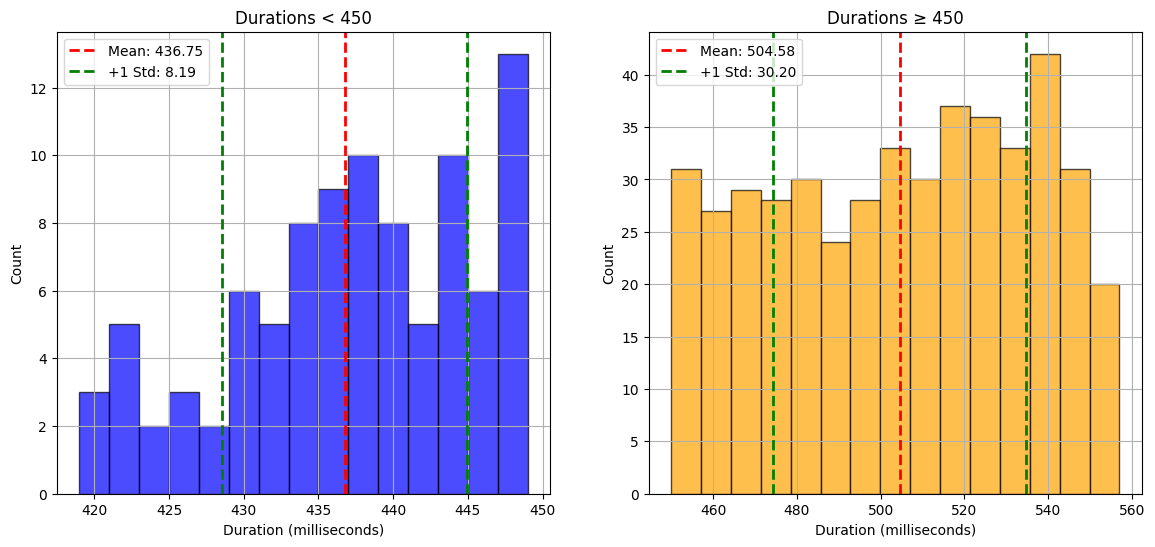

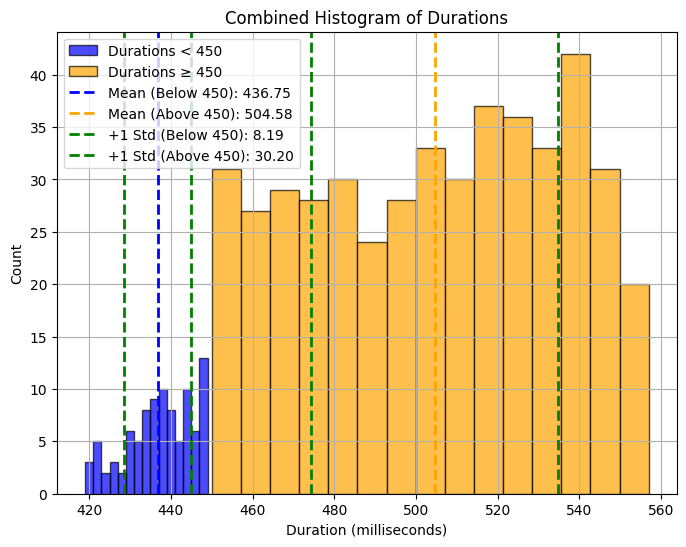

In [292]:

n = 450
df_below_n = filtered_df[filtered_df['durations'] < n]
df_above_n = filtered_df[filtered_df['durations'] >= n]

# Compute mean and standard deviation for both subsets
mean_below = df_below_n['durations'].mean()
std_below = df_below_n['durations'].std()

mean_above = df_above_n['durations'].mean()
std_above = df_above_n['durations'].std()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for durations < 450
axes[0].hist(df_below_n['durations'], bins=15, color='blue', edgecolor='black', alpha=0.7)
axes[0].axvline(mean_below, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_below:.2f}')
axes[0].axvline(mean_below + std_below, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {std_below:.2f}')
axes[0].axvline(mean_below - std_below, color='green', linestyle='dashed', linewidth=2)
axes[0].set_title('Durations < ' + str(n))
axes[0].set_xlabel('Duration (milliseconds)')
axes[0].set_ylabel('Count')
axes[0].grid(True)
axes[0].legend()

# Histogram for durations >= 450
axes[1].hist(df_above_n['durations'], bins=15, color='orange', edgecolor='black', alpha=0.7)
axes[1].axvline(mean_above, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_above:.2f}')
axes[1].axvline(mean_above + std_above, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {std_above:.2f}')
axes[1].axvline(mean_above - std_above, color='green', linestyle='dashed', linewidth=2)
axes[1].set_title('Durations ≥ ' + str(n))
axes[1].set_xlabel('Duration (milliseconds)')
axes[1].set_ylabel('Count')
axes[1].grid(True)
axes[1].legend()

# Histogram for both datasets together
plt.figure(figsize=(8, 6))
plt.hist(df_below_n['durations'], bins=15, color='blue', edgecolor='black', alpha=0.7, label=f'Durations < {n}')
plt.hist(df_above_n['durations'], bins=15, color='orange', edgecolor='black', alpha=0.7, label=f'Durations ≥ {n}')
plt.axvline(mean_below, color='blue', linestyle='dashed', linewidth=2, label=f'Mean (Below {n}): {mean_below:.2f}')
plt.axvline(mean_above, color='orange', linestyle='dashed', linewidth=2, label=f'Mean (Above {n}): {mean_above:.2f}')
plt.axvline(mean_below + std_below, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std (Below {n}): {std_below:.2f}')
plt.axvline(mean_below - std_below, color='green', linestyle='dashed', linewidth=2)
plt.axvline(mean_above + std_above, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std (Above {n}): {std_above:.2f}')
plt.axvline(mean_above - std_above, color='green', linestyle='dashed', linewidth=2)

# Adding labels and title for the combined histogram
plt.title('Combined Histogram of Durations')
plt.xlabel('Duration (milliseconds)')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


In [293]:
# Compute mean values
mean1 = df_below_n['durations'].mean()
mean2 = df_above_n['durations'].mean()

# Compute standard error (standard deviation / sqrt(N))
std_error1 = df_below_n['durations'].std() / np.sqrt(len(df_below_n))
std_error2 = df_above_n['durations'].std() / np.sqrt(len(df_above_n))

# Compute mean of the two means
M = (mean1 + mean2) / 2

# Compute uncertainty on M
sigma_M = 0.5 * np.sqrt(std_error1**2 + std_error2**2)

# Compute M/2 and its uncertainty
M_over_2 = M / 2
sigma_M_over_2 = sigma_M / 2

# Print results
print(f"M/2: {M_over_2:.2f}")
print(f"Uncertainty on M/2: {sigma_M_over_2:.2f}")

M/2: 235.33
Uncertainty on M/2: 0.41


In [294]:
L = .77315

In [297]:
# Compute delta_t using filtered average values
delta_t = filtered_df['average'].iloc[-1] - filtered_df['average'].iloc[0]

# Compute period
period = delta_t / (len(filtered_df) - 1) * 2 * 10**-3

print(period)
print(len(filtered_df))


1.7637866184448463
554


In [298]:
g= 4 * np.pi**2 * L / period**2
g= 4 * np.pi**2 * L / period**2
print(g)

9.811409679043626
